# Midterm Project CS673 Scalable Database

## Analyzing New York City Data with SQL, Python, and Version Control¶



## Project Objective

**The main goal of this project is to analyze three NYPD datasets to gain insights about public safety in New York City. Data Science tools such Python, SQL, and Git to clean, retrieve, and analyze data on the following dataset



### Data sets
1. NYPD Hate Crime in NYC
2. NYPD Shooting
3. NYPD Arrest report



**The end goal is to uncover patterns and trends that can help law enforcement and policymakers make data-driven decisions and keep New York City residence safety and reduce the crime**

### 1. NYPD Hate Crime

In [1]:
# Import the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# read in the dataset

hate_crime = pd.read_csv("NYPD_Hate_Crimes.csv")

hate_crime

,comp_year,month_num,record_date,precinct_code,borough,county,law_ category,offense,pd_code,bias_ motive,offense_cat,arrest_date,arrest_ id
0,2019,2,2/8/19,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,2/8/19,B31678218
1,2019,3,3/9/19,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,3/9/19,B31682790
2,2019,3,3/10/19,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,3/9/19,B31682806
3,2019,3,3/8/19,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,3/9/19,B31682806
4,2019,5,5/11/19,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion/Religious Practice,5/10/19,B31692174
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2023,4,4/10/23,103,PATROL BORO QUEENS SOUTH,QUEENS,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,NaN,NaN
2243,2023,5,5/31/23,103,PATROL BORO QUEENS SOUTH,QUEENS,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-TRANSGENDER,Gender,NaN,NaN
2244,2023,1,1/23/23,114,PATROL BORO QUEENS NORTH,QUEENS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
2245,2023,3,3/13/23,122,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-BLACK,Race/Color,NaN,NaN


## Data Preparation

In [9]:
hate_crime.shape

(2247, 13)

In [10]:
hate_crime.describe()

,comp_year,month_num,precinct_code
count,2247.000000,2247.000000,2247.000000
mean,2021.014686,5.950156,59.902092
std,1.305259,3.284819,38.009633
min,2019.000000,1.000000,1.000000
25%,2020.000000,3.000000,19.000000
50%,2021.000000,6.000000,66.000000
75%,2022.000000,9.000000,90.000000
max,2023.000000,12.000000,123.000000


In [11]:
hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   comp_year       2247 non-null   int64 
 1   month_num       2247 non-null   int64 
 2   record_date     2247 non-null   object
 3   precinct_code   2247 non-null   int64 
 4    borough        2247 non-null   object
 5   county          2247 non-null   object
 6   law_ category   2247 non-null   object
 7   offense         2247 non-null   object
 8   pd_code         2247 non-null   object
 9   bias_ motive    2247 non-null   object
 10  offense_cat     2247 non-null   object
 11  arrest_date     903 non-null    object
 12  arrest_ id      903 non-null    object
dtypes: int64(3), object(10)
memory usage: 228.3+ KB


In [12]:
hate_crime.isnull().sum()

comp_year            0
month_num            0
record_date          0
precinct_code        0
 borough             0
county               0
law_ category        0
offense              0
pd_code              0
bias_ motive         0
offense_cat          0
arrest_date       1344
arrest_ id        1344
dtype: int64

In [14]:
hate_crime.duplicated().sum()

25

In [15]:
hate_crime.columns

Index(['comp_year', 'month_num', 'record_date', 'precinct_code', ' borough ',
       'county', 'law_ category ', 'offense ', 'pd_code', 'bias_ motive ',
       'offense_cat', 'arrest_date', 'arrest_ id'],
      dtype='object')

## Data Cleaning

In [18]:

# Convert 'Record Create Date' and 'Arrest Date' to datetime format (where applicable)

hate_crime['record_date'] = pd.to_datetime(hate_crime['record_date'], errors='coerce')
hate_crime['arrest_date'] = pd.to_datetime(hate_crime['arrest_date'], errors='coerce')

# Check the data types of all columns to confirm changes

hate_crime.dtypes

comp_year                  int64
month_num                  int64
record_date       datetime64[ns]
precinct_code              int64
 borough                  object
county                    object
law_ category             object
offense                   object
pd_code                   object
bias_ motive              object
offense_cat               object
arrest_date       datetime64[ns]
arrest_ id                object
dtype: object

In [22]:
# Impute missing values in 'Arrest Date' and 'Arrest Id' with '0'

hate_crime['arrest_date'].fillna(0,inplace=True)
hate_crime['arrest_ id'].fillna(0, inplace=True)
hate_crime

,comp_year,month_num,record_date,precinct_code,borough,county,law_ category,offense,pd_code,bias_ motive,offense_cat,arrest_date,arrest_ id
0,2019,2,2019-02-08,46,PATROL BORO BRONX,BRONX,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,2019-02-08 00:00:00,B31678218
1,2019,3,2019-03-09,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,2019-03-09 00:00:00,B31682790
2,2019,3,2019-03-10,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,2019-03-09 00:00:00,B31682806
3,2019,3,2019-03-08,48,PATROL BORO BRONX,BRONX,MISDEMEANOR,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,ANTI-WHITE,Race/Color,2019-03-09 00:00:00,B31682806
4,2019,5,2019-05-11,42,PATROL BORO BRONX,BRONX,FELONY,ROBBERY,"ROBBERY,POCKETBOOK/CARRIED BAG",ANTI-MUSLIM,Religion/Religious Practice,2019-05-10 00:00:00,B31692174
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2023,4,2023-04-10,103,PATROL BORO QUEENS SOUTH,QUEENS,FELONY,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",ANTI-MALE HOMOSEXUAL (GAY),Sexual Orientation,0,0
2243,2023,5,2023-05-31,103,PATROL BORO QUEENS SOUTH,QUEENS,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-TRANSGENDER,Gender,0,0
2244,2023,1,2023-01-23,114,PATROL BORO QUEENS NORTH,QUEENS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,0,0
2245,2023,3,2023-03-13,122,PATROL BORO STATEN ISLAND,RICHMOND,MISDEMEANOR,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,ANTI-BLACK,Race/Color,0,0


## Data Exploration

## Q1. County with the highest crime 

In [25]:
hate_crime.corr()

,comp_year,month_num,precinct_code
comp_year,1.000000,-0.198898,0.011184
month_num,-0.198898,1.000000,0.021418
precinct_code,0.011184,0.021418,1.000000


In [29]:
hate_crime['county'].value_counts()

NEW YORK    797
KINGS       777
QUEENS      426
BRONX       163
RICHMOND     84
Name: county, dtype: int64

In [35]:
hate_crime['offense_cat'].value_counts()

Religion/Religious Practice           1110
Race/Color                             586
Sexual Orientation                     319
Ethnicity/National Origin/Ancestry     146
Gender                                  82
Race/Religious Practice                  2
Age                                      1
Disability                               1
Name: offense_cat, dtype: int64

In [38]:
hate_crime['pd_code'].value_counts()

AGGRAVATED HARASSMENT 1           532
ASSAULT 3                         348
AGGRAVATED HARASSMENT 2           318
CRIMINAL MISCHIEF 4TH, GRAFFIT    274
ASSAULT 2,1,UNCLASSIFIED          268
                                 ... 
LARCENY,PETIT FROM STORE-SHOPL      1
ROBBERY,CAR JACKING                 1
MURDER,UNCLASSIFIED                 1
RAPE 1                              1
LARCENY,PETIT FROM OPEN AREAS,      1
Name: pd_code, Length: 69, dtype: int64

In [45]:
hate_crime.groupby(['county'])

In [47]:
county_group_grp = hate_crime.groupby(['county'])

In [50]:
county_group_grp['offense_cat'].value_counts()

county    offense_cat                       
BRONX     Religion/Religious Practice            77
          Race/Color                             38
          Sexual Orientation                     28
          Gender                                 12
          Ethnicity/National Origin/Ancestry      8
KINGS     Religion/Religious Practice           461
          Race/Color                            136
          Sexual Orientation                     87
          Ethnicity/National Origin/Ancestry     64
          Gender                                 29
NEW YORK  Religion/Religious Practice           330
          Race/Color                            268
          Sexual Orientation                    145
          Ethnicity/National Origin/Ancestry     32
          Gender                                 19
          Race/Religious Practice                 2
          Disability                              1
QUEENS    Religion/Religious Practice           201
          Race/Colo

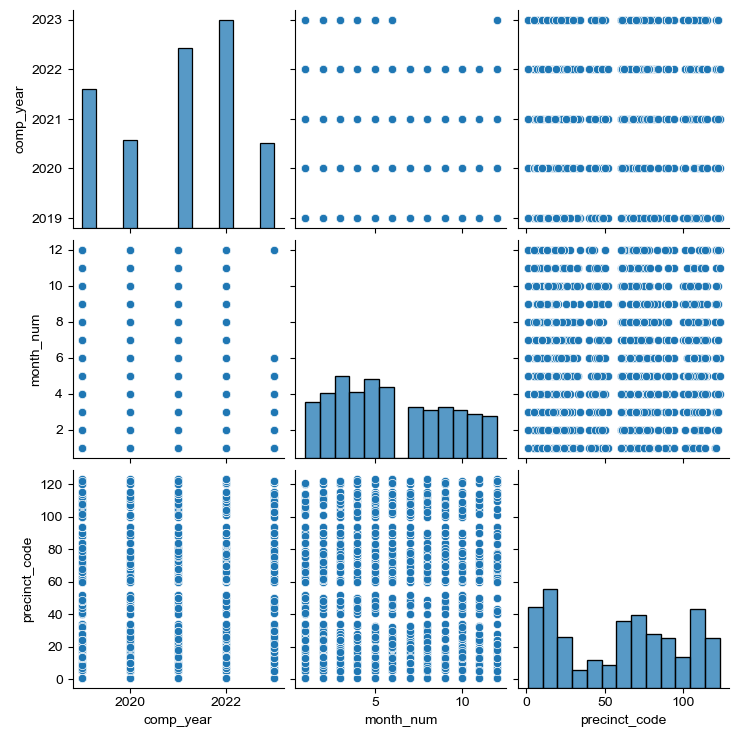

In [63]:
sns.pairplot(hate_crime)
sns.set(rc={'figure.figsize':(15,10)})

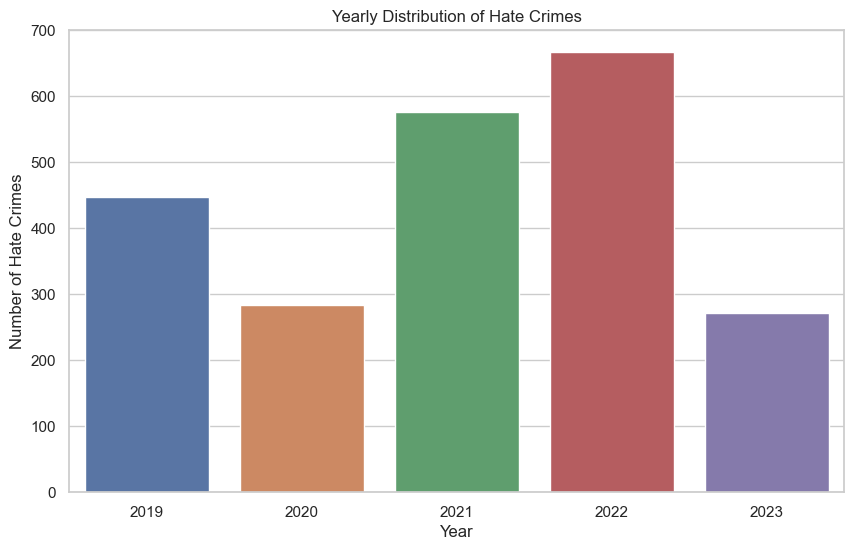

In [75]:
sns.set(style="whitegrid")

# Plot the yearly distribution of hate crimes
plt.figure(figsize=(10, 6))
sns.countplot(x='comp_year', data=hate_crime)
plt.title('Yearly Distribution of Hate Crimes')
plt.xlabel('Year')
plt.ylabel('Number of Hate Crimes')
plt.show()

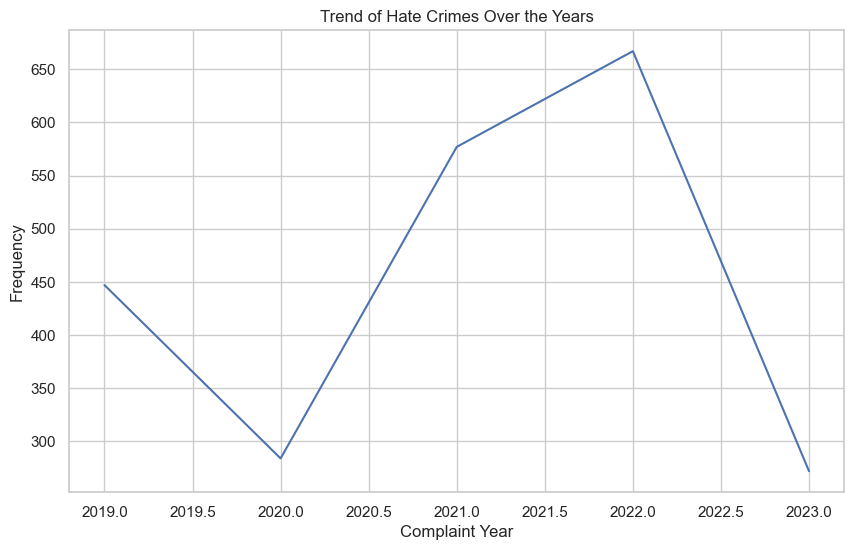

In [81]:
# Time Series Plot: Trend of hate crimes over the years

plt.figure(figsize=(10, 6))
time_series_data = hate_crime.groupby(['comp_year']).size().reset_index(name='Frequency')
sns.lineplot(x='comp_year', y='Frequency', data=time_series_data)
plt.title('Trend of Hate Crimes Over the Years')
plt.xlabel('Complaint Year')
plt.ylabel('Frequency')
plt.show()